<a href="https://colab.research.google.com/github/ElixerofCoding144/Data-Science/blob/main/NLP/Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Table of Contents**


1.   About the Dataset
2.   Generating Word Frequency
3.   EDA using Word Clouds
4.   Why to Preprocess text data?
5.   Challenge








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -u "/content/drive/MyDrive/Machine Learning Colab Notebooks/NLP/Exploring_Twitter_Text_Data.zip" -d "/content/drive/MyDrive/Machine Learning Colab Notebooks/NLP"

Archive:  /content/drive/MyDrive/Machine Learning Colab Notebooks/NLP/Exploring_Twitter_Text_Data.zip
   creating: /content/drive/MyDrive/Machine Learning Colab Notebooks/NLP/Exploring Text Data/
  inflating: /content/drive/MyDrive/Machine Learning Colab Notebooks/NLP/Exploring Text Data/Exploring Text Data.ipynb  
  inflating: /content/drive/MyDrive/Machine Learning Colab Notebooks/NLP/Exploring Text Data/tweets.csv  


In [ ]:
import pandas as pd
dataset = pd.read_csv(r'/content/drive/MyDrive/Machine Learning Colab Notebooks/NLP/Exploring Text Data/tweets.csv', encoding = 'ISO-8859-1')

In [ ]:
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [ ]:
dataset.shape

(14940, 16)

In [ ]:
def gen_freq(text):
  word_list = []
  for tw_words in text.split():
    word_list.extend(tw_words)  # appends from the end of list
  word_freq = pd.Series(word_list).value_counts()
  word_freq[:20]
  return word_freq
gen_freq(dataset.text.str)
  

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
Verdict.                       1
https://t.co/NEu8sXthuw        1
https://t.co/lHPOyYDemj        1
CEO.                           1
yellow                         1
Length: 19601, dtype: int64

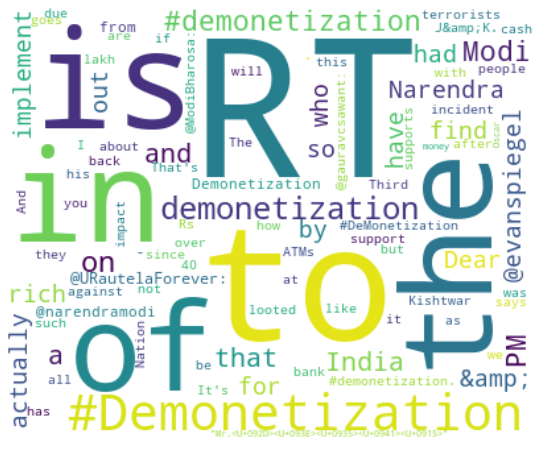

In [ ]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(dataset.text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [ ]:
#Import list of stopwards
from wordcloud import STOPWORDS
#Stop words are a set of commonly used words in a language
print(STOPWORDS)

{"didn't", 'too', 'because', 'get', 'again', 'would', 'up', 'your', "haven't", 'could', 'then', 'these', 'until', 'an', 'between', 'shall', 'here', 'ever', 'however', "she's", "they'd", 'while', 'same', 'than', 'themselves', "shan't", 'this', 'can', 'has', 'hers', 'a', "i'm", 'am', "he'll", 'below', 'i', 'ourselves', "they're", 'on', "it's", 'his', 'you', 'in', 'since', 'from', 'does', 'did', 'each', 'for', 'who', 'www', "weren't", 'yourself', "you've", "they'll", 'her', 'are', 'as', 'k', 'our', 'it', 'itself', 'yours', 'few', 'over', 'no', 'those', 'out', "he's", 'that', 'its', 'and', 'there', "can't", "don't", 'himself', 'only', 'more', 'very', 'their', "there's", "who's", 'my', "when's", 'into', 'through', "aren't", "doesn't", 'having', "they've", 'to', 'off', "shouldn't", 'theirs', 'herself', "we'd", 'we', "we'll", 'about', "he'd", 'of', 'yourselves', "we're", "i've", 'otherwise', 'nor', 'else', 'have', "how's", "why's", 'being', 'if', 'him', 'but', 'was', 'been', 'both', "i'll", '

In [ ]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()